In [1]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from torchvision import datasets, transforms

## une fois le dataset telecharge, mettre download=False !
## Pour le test, train = False
## transform permet de faire un preprocessing des donnees (ici ?)
train_loader = torch.utils.data.DataLoader(datasets.MNIST('./data', train=True, download=True,\
    transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,),(0.3081,))])), batch_size=64, shuffle=True)

In [3]:
class Highway(nn.Module):
    def __init__(self, features, bias=True, actF = nn.Sigmoid()):
        super(Highway, self).__init__()
        self.H = nn.Linear(features, features, bias)
        self.T = nn.Linear(features, features, bias)
        self.actF = actF

    def forward(self, x):
        return self.actF(self.H(x)) * self.actF(self.T(x)) + x * (1-self.actF(self.T(x)))

Iteration 0
Iteration 50
Iteration 100
Iteration 150
Iteration 200
Iteration 250
Iteration 300
Iteration 350
Iteration 400
Iteration 450
Iteration 500


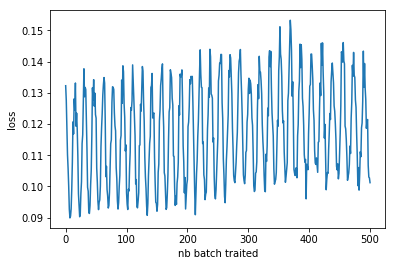

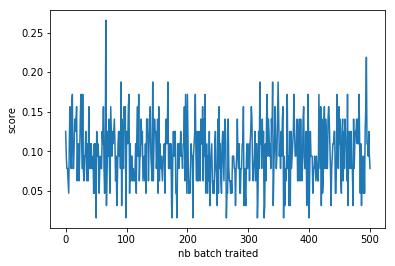

In [4]:
torch.manual_seed(1)
m = nn.Sequential(*[Highway(784) for i in range(10)], nn.Linear(784,10))
ml = nn.MSELoss()
ite = 500
opt = optim.SGD(m.parameters(), lr=1e-3)

lossHisto = []
scoreHisto = []

for i,(x,yN) in enumerate(train_loader):
    if i > ite :
        break
    if i%(ite/10) == 0:
        print("Iteration", i)
    
    x = autograd.Variable(x.view(-1,784))
        
    y_onehot = torch.FloatTensor(*yN.size(), 10).zero_()
    y_onehot.scatter_(1, torch.unsqueeze(yN, 1), 1)
    y = autograd.Variable(y_onehot)
    
    f = m.forward(x)
    loss = ml.forward(f, y)
    loss.backward()
    opt.step()
    
    lossHisto.append(loss.data.mean())
    ypred = torch.max(f, 1)[1]
    scoreHisto.append(torch.eq(ypred.data, yN).float().mean())
    
plt.plot(lossHisto)
plt.ylabel('loss')
plt.xlabel('nb batch traited')
plt.show()
plt.plot(scoreHisto)
plt.ylabel('score')
plt.xlabel('nb batch traited')
plt.show()

In [ ]:
torch.manual_seed(1)
m = nn.Sequential(*[Highway(784) for i in range(10)], nn.Linear(784,10))
ml = nn.MSELoss()
ite = 500
opt = optim.lr_scheduler.StepLR(optim.SGD(m.parameters(), lr=1e-3),ite/10, 1)

lossHisto = []
scoreHisto = []

for i,(x,yN) in enumerate(train_loader):
    if i > ite :
        break
    if i%(ite/10) == 0:
        print("Iteration", i)
        print(opt.get_lr())
    x = autograd.Variable(x.view(-1,784))
        
    y_onehot = torch.FloatTensor(*yN.size(), 10).zero_()
    y_onehot.scatter_(1, torch.unsqueeze(yN, 1), 1)
    y = autograd.Variable(y_onehot)
    
    f = m.forward(x)
    loss = ml.forward(f, y)
    loss.backward()
    opt.step()
    
    lossHisto.append(loss.data.mean())
    ypred = torch.max(f, 1)[1]
    scoreHisto.append(torch.eq(ypred.data, yN).float().mean())
    
plt.plot(lossHisto)
plt.ylabel('loss')
plt.xlabel('nb batch traited')
plt.show()
plt.plot(scoreHisto)
plt.ylabel('score')
plt.xlabel('nb batch traited')
plt.show()

Les 2 optimiseurs sont censé faire la même chose (```lr_scheduler.StepLR``` est censé être un module diminuant le gradient toute les t steps de a\*grad) mais on voit que les courbes de loss sont les même (la graine est la même).

Iteration 0
Iteration 150
Iteration 300
Iteration 450
Iteration 600
Iteration 750
Iteration 900


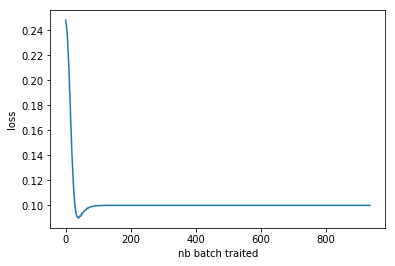

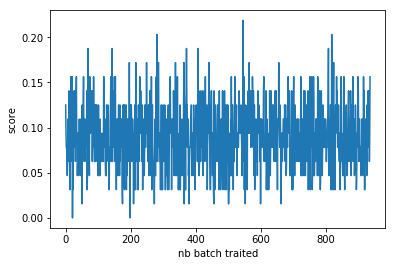

In [15]:
torch.manual_seed(1)
m = nn.Sequential(*[Highway(784) for i in range(10)], nn.Linear(784,10), nn.Sigmoid())
ml = nn.MSELoss()
ite = 1500
opt = optim.SGD(m.parameters(), lr=1e-3)

lossHisto = []
scoreHisto = []

for i,(x,yN) in enumerate(train_loader):
    if i > ite :
        break
    if i%(ite/10) == 0:
        print("Iteration", i)
    
    x = autograd.Variable(x.view(-1,784))
        
    y_onehot = torch.FloatTensor(*yN.size(), 10).zero_()
    y_onehot.scatter_(1, torch.unsqueeze(yN, 1), 1)
    y = autograd.Variable(y_onehot)
    
    f = m.forward(x)
    loss = ml.forward(f, y)
    loss.backward()
    opt.step()
    
    lossHisto.append(loss.data.mean())
    ypred = torch.max(f, 1)[1]
    scoreHisto.append(torch.eq(ypred.data, yN).float().mean())
    
plt.plot(lossHisto)
plt.ylabel('loss')
plt.xlabel('nb batch traited')
plt.show()
plt.plot(scoreHisto)
plt.ylabel('score')
plt.xlabel('nb batch traited')
plt.show()

Malgrès le loss diminuant, le score n'a pas l'air d'augmenter. De plus le pas de gradient est difficile à trouver, trop élevé et ça oscille, trop faible et ça n'atteind pas le minimum.

Iteration 0
Iteration 150
Iteration 300
Iteration 450
Iteration 600
Iteration 750
Iteration 900


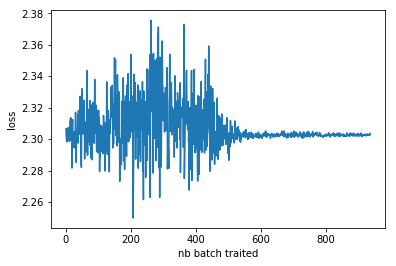

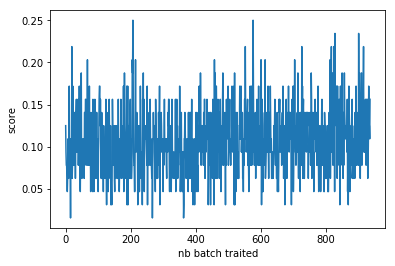

In [18]:
torch.manual_seed(1)
m = nn.Sequential(*[Highway(784) for i in range(10)], nn.Linear(784,10), nn.Sigmoid())
ml = nn.CrossEntropyLoss()
ite = 1500
opt = optim.SGD(m.parameters(), lr=1e-3)

lossHisto = []
scoreHisto = []

for i,(x,yN) in enumerate(train_loader):
    if i > ite :
        break
    if i%(ite/10) == 0:
        print("Iteration", i)
    
    x = autograd.Variable(x.view(-1,784))
    y = autograd.Variable(yN)
    
    f = m(x)
    loss = ml(f, y)
    loss.backward()
    opt.step()
    
    lossHisto.append(loss.data.mean())
    ypred = torch.max(f, 1)[1]
    scoreHisto.append(torch.eq(ypred.data, yN).float().mean())
    
plt.plot(lossHisto)
plt.ylabel('loss')
plt.xlabel('nb batch traited')
plt.show()
plt.plot(scoreHisto)
plt.ylabel('score')
plt.xlabel('nb batch traited')
plt.show()